# Week 5 - Sampling & Reliability

Up until this week, we have assumed that the corpus you have used for analysis assignments represented a *meaningful* assemblage of texts from which reasonable inferences could be drawn about the social game, social world and social actors that produced it. This week, we ask you to articulate what your sample represents in context of your final project, and draw upon methods we have developed over the last three weeks to draw reasonable and representative samples. 

This week we also pivot from our recent work on unsupervized machine learning approaches to explore how we can get *human* readings of content at scale. We want to gather and utilize human responses for several reasons. First, we may want to use crowdsourced human scores as the primary method of coding, extracting or organizing content (as it was in the two of the assigned readings). Second, we may want to validate or tune a computational algorithm we may have developed in terms of how it is associated with human meanings or experience. Finally, we may want to use human coding on a sample of data as the basis for training a model or algorithm to then extrapolate *human-like* annotations to the entire population. Here intelligent sampling is critical to maximize effective maching training. 

For this notebook we will be using the following packages

In [1]:
#Special module written for this class
#This provides access to data and to helper functions from previous weeks
#Make sure you update it before starting this notebook
import lucem_illud #pip install -U git+git://github.com/Computational-Content-Analysis-2018/lucem_illud.git

#All these packages need to be installed from pip
import numpy as np #For arrays
import scipy as sp #For some stats
import pandas #Gives us DataFrames
import matplotlib.pyplot as plt #For graphics
import seaborn #Makes the graphics look nicer
import pyanno #On python3 make sure to pip install pyanno3

#We need to import these this way due to how pyanno is setup
from pyanno.measures import pairwise_matrix, agreement, cohens_kappa, cohens_weighted_kappa, fleiss_kappa, krippendorffs_alpha, pearsons_rho, scotts_pi, spearmans_rho
from pyanno.annotations import AnnotationsContainer
from pyanno.models import ModelA, ModelBt, ModelB

from functools import reduce
from itertools import permutations
import math


#This 'magic' command makes the plots work better
#in the notebook, don't use it outside of a notebook.
#Also you can ignore the warning
%matplotlib inline

import os #For looking through files
import os.path #For managing file paths

## <span style="color:red">*Pitch Your Project*</span>

<span style="color:red">In the three cells immediately following, describe **WHAT** you are planning to analyze for your final project (i.e., texts, contexts and the social game, world and actors you intend to learn about through your analysis) (<200 words), **WHY** you are going to do it (i.e., why would theory and/or the average person benefit from knowing the results of your investigation) (<200 words), and **HOW** you plan to investigate it (i.e., what are the approaches and operations you plan to perform, in sequence, to yield this insight) (<400 words).

## ***What?*** 
<200 words

<span style="color:blue"> I am working with my teammate Oscar and Hyunku on transcripts of soap operas. We would scrape transcripts of 11 soap operas, approximately 30,000 episodes in total, to support this project. We aim to analyze social interaction within and between genders, on the basis of dialogs in the soap opera. In detail, we want to know men's reaction to women's talk, women's reaction to men's talk, men's reaction to men's talk, and women's reaction to men's talk. Since that website contains transcripts of the same soap operas along several years, we would also analyze the dynamics of the interactions, which is very likely to reflect changes of the real world. We would also compare topics of dialogs within and between genders, and look at the changes along these years.</span>

## ***Why?***
<200 words

<span style="color:blue"> This project would help both academia and average people by developing better understanding of the interaction within and between genders. Compared to research with traditional methods, this project could easily keep track of dynamics of the relationship. In addition, this project allows us to capture various possible patterns, without the constraints set by many other forms of data collection.</span>

## ***How?***
<400 words

<span style="color:blue"> The transcripts are posted on a website "http://tvmegasite.net". We first construct programs to scrape the transcripts from it, which is already in processing. I first construct a program to scrape all the urls of the webpages posting the transcripts, with each webpage posting a single episode. And the total quantity of episodes is 29994. I've also construct a program to scrape transcripts. By now, I've scraped transcripts of 2 soap operas, approximately 100 MB.</span>

<span style="color:blue"> By now, we plan to use topic modeling, word embedding, clustering, and MTurk for the analysis. One problem of the transcripts is that they contains many names of people. If there is no existing package to distinguish men's names and women's names, we would use MTurk to ask the workders to do the distinguishment. We would use clustering methods to get the structure of the texts. Since we want to analyze the interactions, we would use word embedding methods to get the similarities among words, scenes (dialogs), or episodes (since we haven't decided what level we should start with). And we would use topic modeling to get the topics of our research unit.</span>

## <span style="color:red">*Pitch Your Sample*</span>

<span style="color:red">In the cell immediately following, describe the rationale behind your proposed sample design for your final project. What is the social game, social work, or social actors you about whom you are seeking to make inferences? What are its virtues with respect to your research questions? What are its limitations? What are alternatives? What would be a reasonable path to "scale up" your sample for further analysis (i.e., high-profile publication)? (<200 words).

### What is the social game, social work, or social actors about whom you are seeking to make inferences?

<span style="color:blue"> The social game is the interaction within and between genders. Since the soap operas are made and played in US, they could reflect phenomena in US society. So the social actors of our interest is general men and women within US society.</span>

### What are its virtues with respect to your research questions?

<span style="color:blue"> Dialogs in the soap operas could be a good material to capture the interaction within and between genders, and their perspectives on themselves and each other. In addidion, many soap operas in our corpus are made and played for many years, which allows us to trace back to, like, 10 years ago, to captures the dynamics of the interaction and perspectives.</span>

### What are its limitations? What are alternatives?

<span style="color:blue"> The limitation is that soap opera is not the real world, although they reflect the real world. One alternative is to analyze interaction in the real world, by recording interaction among people, but the process for data collection is both resource-demanding and time-demanding.</span>

### What would be a reasonable path to "scale up" your sample for further analysis (i.e., high-profile publication)?

<span style="color:blue"> Expand our resources of transcripts, to include soap operas of various types.</span>

## ***Which (words)?***
<300 words

<span style="color:blue"> The meaning of this question is very vague. I guess it asks which words we are planning to emphasize in analysis. We're looking for agreement/disagreement, attitudes, and these in different contexts (e.g. at home, at work, at social occasions). I have been already working on the data scraping and analytical work. Please see our github repo (https://github.com/gloriawu331/content_analysis_project) for our current stages, and see the sample approaches below "Exercise 1" to look at what analytical approaches I'm planning to do. Details are in discussion.</span>

## <span style="color:red">*Exercise 1*</span>

<span style="color:red">In the cells immediately following, demonstrate three approaches drawn from any of the last three weeks to create subsamples of your corpus (e.g., for crowd-sourced subcoding like we'll be doing this week). Methods of subsampling include (a) corpus linguistic approaches drawing on word presence or co-presence, conditional frequencies, weighted words (e.g., tf.idf), KL or JS divergences, etc.; (b) hierarchical or flat clustering approaches; (c) topic modeling; or (d) word-embedding. (<200 words).

<span style="color:blue"> If we get subsamples from our corpus, we could analyze the differences among different contexts. To use the methods we learned in the past weeks, we plan to apply (b), (c), and (d) on our data. We could use flat clustering technique to get clusters of the episodes, then explore the interaction within and between men and women in each cluster. We could also use topic modeling to get the main topics of the episodes, to reduce the dimension. And within each topic, we could look at how men and women interact with each other, and whether there is any difference among different topics. And we could use the word-embedding to explore how men and women look at themselves, each other, and a series of concepts/items.</span>

## Sample Approaches

### Initialize: Get the Data

In [59]:
# Read in sample data: transcripts of the soap opera All My Children
d = {'filename':[], 'text':[]}
dir_amc = '/Users/hsswyx/Desktop/content_analysis/content_analysis_project/data/amc'
year_lst = os.listdir(dir_amc) [1:]
for i in range(len(year_lst)):
    episodes = os.listdir(dir_amc+'/'+year_lst[i])
    for j in range(len(episodes)):
        file_name = year_lst[i]+'/'+episodes[j]
        temp_text = ''
        with open(dir_amc+'/'+file_name) as f:
            for line in f:
                temp_text += line.replace('\n', ' ')
        d['filename'].append(file_name)
        d['text'].append(temp_text)

# Write data into Pandas DataFrame
amcDF = pandas.DataFrame(d)

In [68]:
amcDF

,filename,text,kmeans_predictions,tokenized_text,normalized_tokens,reduced_tokens
0,1998/02-14-84.txt,All My Children Transcript Tuesday 2/14/84 ...,3,"[All, My, Children, Transcript, Tuesday, 2/14/...","[children, transcript, tuesday, pleas, click, ...","[children, transcript, tuesday, pleas, click, ..."
1,1998/03-04-93.txt,All My Children Transcript Thursday 3/4/93 ...,3,"[All, My, Children, Transcript, Thursday, 3/4/...","[children, transcript, thursday, pleas, click,...","[children, transcript, thursday, pleas, click,..."
2,1998/06-04-98.txt,All My Children Transcript Thursday 6/4/98 Pro...,2,"[All, My, Children, Transcript, Thursday, 6/4/...","[children, transcript, thursday, provid, suzan...","[children, transcript, thursday, suzann, hayle..."
3,1998/07-07-98.txt,All My Children Transcript Tuesday 7/7/98 Prov...,2,"[All, My, Children, Transcript, Tuesday, 7/7/9...","[children, transcript, tuesday, provid, suzann...","[children, transcript, tuesday, suzann, proofr..."
4,1998/09-03-80.txt,All My Children Transcript Wednesday 9/3/80 ...,3,"[All, My, Children, Transcript, Wednesday, 9/3...","[children, transcript, wednesday, pleas, click...","[children, transcript, wednesday, pleas, click..."
5,1999/02-22-99.txt,All My Children Transcript Monday 2/22/99 Prov...,3,"[All, My, Children, Transcript, Monday, 2/22/9...","[children, transcript, monday, provid, suzann,...","[children, transcript, monday, suzann, raquel,..."
6,1999/07-08-99.txt,[an error occurred while processing this dire...,3,"[[, an, error, occurred, while, processing, th...","[error, occur, process, thi, direct, children,...","[error, occur, process, direct, children, tran..."
7,2001/04-09-01.txt,All My Children Transcript Monday 4/9/01 \...,2,"[All, My, Children, Transcript, Monday, 4/9/01...","[children, transcript, monday, pleas, click, d...","[children, transcript, monday, pleas, click, s..."
8,2001/05-09-01.txt,All My Children Transcript Wednesday 5/9/01 Pr...,2,"[All, My, Children, Transcript, Wednesday, 5/9...","[children, transcript, wednesday, provid, aman...","[children, transcript, wednesday, amanda, proo..."
9,2001/06-20-01.txt,All My Children Transcript Wednesday 6/20/01 ...,2,"[All, My, Children, Transcript, Wednesday, 6/2...","[children, transcript, wednesday, provid, suza...","[children, transcript, wednesday, suzann, proo..."


### (b) Flat Clustering Approach

In [60]:
## Flat Clustering Approach: K-Means

# First, import all the packages
import sklearn
import sklearn.feature_extraction.text
import sklearn.pipeline
import sklearn.preprocessing
import sklearn.datasets
import sklearn.cluster
import sklearn.decomposition
import sklearn.metrics

# Convert the documents into word count vectors
# Initialize without tf-idf weights
ngCountVectorizer = sklearn.feature_extraction.text.CountVectorizer()
# Train
amcgroupsVects = ngCountVectorizer.fit_transform(amcDF['text'])
#print(amcgroupsVects.shape)
#musicgroupsVects[:10,:20].toarray()
ngCountVectorizer.vocabulary_.get('vector')

# Initialize with tf-idf weights
amcgroupsTFTransformer = sklearn.feature_extraction.text.TfidfTransformer().fit(amcgroupsVects)
# Train
amcgroupsTF = amcgroupsTFTransformer.transform(amcgroupsVects)
#print(amcgroupsTF.shape)
#initialize
ngTFVectorizer = sklearn.feature_extraction.text.TfidfVectorizer(stop_words='english')
#train
amcgroupsTFVects = ngTFVectorizer.fit_transform(amcDF['text'])

In [62]:
# Initiate K-means cluster finder
km = sklearn.cluster.KMeans(n_clusters=4, init='k-means++')
km.fit(amcgroupsTFVects)
amcDF['kmeans_predictions'] = km.labels_

In [64]:
# Check distinguishing features in each cluster
terms = ngTFVectorizer.get_feature_names()
print("Top terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
for i in range(4):
    print("Cluster %d:" % i)
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind])
    print('\n')

Top terms per cluster:
Cluster 0:
 babe
 kendall
 zach
 ryan
 know
 josh
 don
 just
 tad
 greenlee


Cluster 1:
 bianca
 kendall
 know
 greenlee
 babe
 just
 ryan
 don
 erica
 maria


Cluster 2:
 leo
 anna
 chris
 know
 mia
 greenlee
 liza
 david
 edmund
 don


Cluster 3:
 annie
 know
 just
 jesse
 ryan
 jake
 don
 david
 greenlee
 angie




### Topic Modeling

In [65]:
# First, import all the packages
import nltk #the Natural Language Toolkit

# Tokenize the texts
amcDF['tokenized_text'] = amcDF['text'].apply(lambda x: nltk.word_tokenize(x))

In [66]:
# Normalization
def normlizeTokens(tokenLst, stopwordLst = None, stemmer = None, lemmer = None):
    #We can use a generator here as we just need to iterate over it

    #Lowering the case and removing non-words
    workingIter = (w.lower() for w in tokenLst if w.isalpha())

    #Now we can use the semmer, if provided
    if stemmer is not None:
        workingIter = (stemmer.stem(w) for w in workingIter)
        
    #And the lemmer
    if lemmer is not None:
        workingIter = (lemmer.lemmatize(w) for w in workingIter)
    
    #And remove the stopwords
    if stopwordLst is not None:
        workingIter = (w for w in workingIter if w not in stopwordLst)
    #We will return a list with the stopwords removed
    return list(workingIter)

from nltk.corpus import stopwords
stop_words_nltk = stopwords.words('english')
amcDF['normalized_tokens'] = amcDF['tokenized_text'].apply(lambda x: normlizeTokens(x, stopwordLst = stop_words_nltk, stemmer = nltk.stem.porter.PorterStemmer()))

# Drop the tokenized and normalized words that are not in the vocabulary
def dropMissing(wordLst, vocab):
    return [w for w in wordLst if w in vocab]
amcDF['reduced_tokens'] = amcDF['normalized_tokens'].apply(lambda x: dropMissing(x, ngCountVectorizer.vocabulary_.keys()))


In [ ]:
amc_d = gensim.corpora.Dictionary(amcDF['reduced_tokens'])
amc_corpus = [amc_d.doc2bow(text) for text in amcDF['reduced_tokens']]
gensim.corpora.MmCorpus.serialize('amc.mm', amc_corpus)
amc_senmm = gensim.corpora.MmCorpus('amc.mm')

amc_senlda = gensim.models.ldamodel.LdaModel(corpus=amc_senmm, id2word=amc_d, num_topics=10, alpha='auto', eta='auto')

amc_ldaDF = pandas.DataFrame({
        'name' : amcDF['file_name'],
        'topics' : [amc_senlda[amc_d.doc2bow(l)] for l in amcDF['reduced_tokens']]
    })

In [ ]:
#Dict to temporally hold the probabilities
amc_topicsProbDict = {i : [0] * len(amc_ldaDF) for i in range(amc_senlda.num_topics)}
#Load them into the dict
for index, topicTuples in enumerate(amc_ldaDF['topics']):
    for topicNum, prob in topicTuples:
        amc_topicsProbDict[topicNum][index] = prob
#Update the DataFrame
for topicNum in range(amc_senlda.num_topics):
    amc_ldaDF['topic_{}'.format(topicNum)] = amc_topicsProbDict[topicNum]

#music_ldaDF[1::100]

In [ ]:
amc_ldaDFV = amc_ldaDF[:10][['topic_%d' %x for x in range(10)]]
amc_ldaDFVisN = amc_ldaDF[:10][['name']]
amc_ldaDFVis = amc_ldaDFV.as_matrix(columns=None)
amc_ldaDFVisNames = amc_ldaDFVisN.as_matrix(columns=None)
amc_ldaDFV

### Word-Embedding

In [ ]:
# Build Word2Vec model
amcDF['tokenized_sents'] = amcDF['text'].apply(lambda x: [nltk.word_tokenize(s) for s in nltk.sent_tokenize(x)])
amcDF['normalized_sents'] = amcDF['tokenized_sents'].apply(lambda x: [lucem_illud.normalizeTokens(s, stopwordLst = lucem_illud.stop_words_basic, stemmer = None) for s in x])


In [ ]:
# word2vec
musicW2V = gensim.models.word2vec.Word2Vec(df['normalized_sents'].sum())
musicW2V.most_similar('home')
musicW2V.most_similar('work')

# Example Annotation Dataset

Load Rzhetsky et al (2009)'s sample dataset, which can be found [here](https://github.com/enthought/uchicago-pyanno/tree/master/data). This data is the result of a content analytic / content extraction study in which Andrey Rzhetsky and colleagues from the National Library of Medicine, published [here](http://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1000391) in [PLOS Computational Biology](http://journals.plos.org/ploscompbiol/), gave eight annotators 10,000 sentence chunks from biomedical text in biomedical abstracts and articles, then asked them, in a loop design schematically illustrated below that provided 3 independent codings for each document. The sampling strategy pursued diversity by drawing from PubMed abstracts (1000) and full-text articles (9000: 20% from abstracts, 10% from introductions, 20% from methods, 25% from results, and 25% from discussions.) The dataset extract here involves respondents codes for sentences in terms of their *Evidence*: {0, 1, 2, 3, -1} where 0 is the complete lack of evidence, 3 is direct evidence present within the sentence, and -1 is didn't respond. (They also crowdsourced and analyzed *polarity*, *certainty*, and *number*). For example, consider the following two abutting sentence chunks: *"Because null mutations in toxR and toxT abolish CT and TcpA expression in the El Tor biotype and also attenuate virulence..."* [i.e., average certainty = 0], *"...it is likely that the ToxR regulon has functional similarities between the two biotypes despite the clear differences in the inducing parameters observed in vitro"* [i.e., average certainty = 1]."

In [3]:
x = np.loadtxt("../data/pyAnno/testdata_numerical.txt")
anno = AnnotationsContainer.from_array(x, missing_values=[-1])

In [4]:
x

array([[ 2.,  3.,  4., ..., -1., -1., -1.],
       [ 1.,  1.,  1., ..., -1., -1., -1.],
       [ 3.,  3.,  2., ..., -1., -1., -1.],
       ...,
       [ 3.,  3., -1., ..., -1., -1.,  2.],
       [ 3.,  3., -1., ..., -1., -1.,  4.],
       [ 2.,  2., -1., ..., -1., -1.,  1.]])

Interrogate the AnnotationsContainer object.

In [7]:
anno.annotations

array([[ 1,  2,  3, ..., -1, -1, -1],
       [ 0,  0,  0, ..., -1, -1, -1],
       [ 2,  2,  1, ..., -1, -1, -1],
       ...,
       [ 2,  2, -1, ..., -1, -1,  1],
       [ 2,  2, -1, ..., -1, -1,  3],
       [ 1,  1, -1, ..., -1, -1,  0]])

In [8]:
anno.labels

[1.0, 2.0, 3.0, 4.0]

In [9]:
anno.missing_values

[-1]

# Annotation Statistics

First, we assume categorical codes...that each code is qualitatively distinct from each other. Two measures are primarily used for this: Scott's $\pi$, Cohen's $\kappa$, and Krippendorff's $\alpha$ which each measure the extent of agreement between two annotators, but take into account the possibility of the agreement occurring by chance in slightly different ways. Any agreement measure begins with the frequency of codes:

In [10]:
pyanno.measures.agreement.labels_frequency(anno.annotations,4)

array([0.11666667, 0.245     , 0.34083333, 0.2975    ])

Now consider the "confusion matrix" or matrix of coded agreements between any two coders:

[[ 8.  7.  3.  2.]
 [ 9. 30. 13.  3.]
 [ 2.  9. 42. 11.]
 [ 1.  7. 14. 39.]]


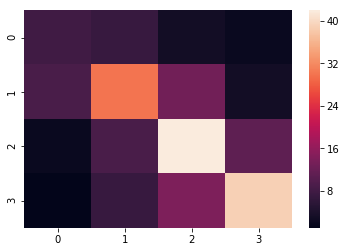

In [11]:
c = pyanno.measures.agreement.confusion_matrix(anno.annotations[:,0], anno.annotations[:,1],4)
print(c)
ac = seaborn.heatmap(c)
plt.show()

Scott's $\pi$ is computed as:

$\pi = \frac{\text{Pr}(a)-\text{Pr}(e)}{1-\text{Pr}(e)}$

Where Pr($a$) is relative observed agreement, and Pr($e$) is expected agreement using joint proportions calculated from the confusion matrix or matrix of coded agreements between any two coders:

In [12]:
scotts_pi(anno.annotations[:,0], anno.annotations[:,1])

0.4386478265891502

The generalization of Scott's $\pi$ to $n$ coders is Fleiss' $\kappa$ (Fleiss called it $\kappa$ because he thought he was generalizing Cohen's $\kappa$)

In [13]:
fleiss_kappa(anno.annotations[::])

0.40417653771912765

Krippendorff's $\alpha$ generalizes of Fleiss' $\kappa$ to $n$ coders and takes into account the fact that annotations here are not categorically different, but ordinal, by adding a weight matrix in which off-diagonal cells contain weights indicating the seriousness of the disagreement between each score. When produced with no arguments, it simply produces an arithmetic distance (e.g., 3-1=2), such that cells one off the diagonal are weighted 1, two off 2, etc.

In [14]:
krippendorffs_alpha(anno.annotations[::])

0.6472588223831547

Like Scott's $\pi$, Cohen's $\kappa$ also takes into account the possibility of the agreement occurring by chance, but in the following way:

$\kappa = \frac{p_o-p_e}{1-p_e}=1-\frac{1-p_o}{p_e}$

where $p_o$ is the relative observed agreement among raters, and $p_e$ is the hypothetical probability of chance agreement, using the observed data to calculate the probabilities of each observer randomly saying each category. If the raters are in complete agreement then $\kappa = 1$. If there is no agreement among the raters other than what would be expected by chance (as given by $p_e$), $\kappa ≤ 0 $. Here, Cohen's $\kappa$ statistic for the first two annotators is computed. This is probably the most common metric of agreement.

In [15]:
cohens_kappa(anno.annotations[:,0], anno.annotations[:,1])

0.43917037219392857

In [16]:
m = pairwise_matrix(cohens_kappa, anno.annotations)
print(m)

[[1.         0.43917037 0.47677621        nan        nan        nan
  0.45819119 0.43381462]
 [0.43917037 1.         0.38432922 0.41344423        nan        nan
         nan 0.33643611]
 [0.47677621 0.38432922 1.         0.39583333 0.51704894        nan
         nan        nan]
 [       nan 0.41344423 0.39583333 1.         0.34597068 0.4446844
         nan        nan]
 [       nan        nan 0.51704894 0.34597068 1.         0.37938644
  0.43039733        nan]
 [       nan        nan        nan 0.4446844  0.37938644 1.
  0.38341929 0.31214748]
 [0.45819119        nan        nan        nan 0.43039733 0.38341929
  1.         0.394806  ]
 [0.43381462 0.33643611        nan        nan        nan 0.31214748
  0.394806   1.        ]]


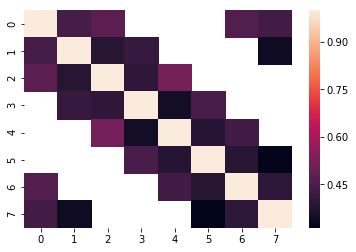

In [17]:
ax = seaborn.heatmap(m)
plt.show()

You can see that this 8 by 3 loop design will be less stable than an 8 choose 3 combinatorial design, because each codes with more others. 

One can also assess the average Cohen's $\kappa$ for all pairs of coders that have coded against one another:

In [18]:
def pairwise_metric_average(metric, array):
    """Calculate the pairwise metric average for the real elements of metric function run on an array of annotations"""
    p = permutations(range(array[0,:].size),2)
    m = [metric(array[:,x[0]], array[:,x[1]]) for x in p]
    clean_m = [c for c in m if not math.isnan(c)]
    return reduce(lambda a, b: a + b, clean_m)/len(clean_m)    
 
pairwise_metric_average(cohens_kappa, anno.annotations)

0.40911598940065674

As recognized with Krippendorff's flexible $\alpha$, our scores are *not* categorical, but rather ordered and her considered metric. Weighted $\kappa$ allows you to count disagreements differently and is useful when codes are ordered as they are here. Here a weight matrix is added to the calculation, in which off-diagonal cells contain weights indicating the seriousness of the disagreement between each score. When automatically produced, it simply produces an arithmetic distance (e.g., 3-1=2), such that cells one off the diagonal are weighted 1, two off 2, etc. Here

$\kappa = 1-\frac{\sum^k_{i=1}\sum^k_{j=1}w_{ij}x_{ij}}{\sum^k_{i=1}\sum^k_{j=1}w_{ij}m_{ij}}$

where $\kappa$ = $n$ codes and $w_{ij}$,$x_{ij}$, and $m_{ij}$ represent elements in the weight, observed, and expected matrices, respectively. (Obviously, when diagonal cells contain weights of 0 and off-diagonal cells weights of 1, this equals $\kappa$).

In [56]:
cohens_weighted_kappa(anno.annotations[:,0], anno.annotations[:,1])

0.5330240507874497

Or averaged over the total:

In [20]:
pairwise_metric_average(cohens_weighted_kappa,anno.annotations)

0.5299113458717166

Alternatively, if the annontation data can be understood as indicating real values, we can assess not agreement, but rather the correlation of values (Pearson's $\rho$) or correlation of ranks (Spearman's $\rho$) for pairs of coders:

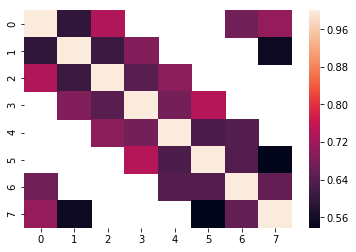

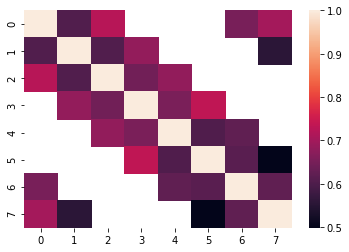

In [21]:
n = pairwise_matrix(pearsons_rho, anno.annotations)
m = pairwise_matrix(spearmans_rho, anno.annotations)
an = seaborn.heatmap(n)
plt.show()
am = seaborn.heatmap(m)
plt.show()

Or averaged over all comparable pairs:

In [22]:
print(pairwise_metric_average(pearsons_rho,anno.annotations), pairwise_metric_average(spearmans_rho,anno.annotations))

0.6517219321175077 0.63808488688039


## <span style="color:red">*Excercise 2*</span>

<span style="color:red">Perform a content annotation survey of some kind in which at least 3 people evaluate and code each piece of content, using Amazon Mechanical Turk as described in the MTurk slides on this week's Canvas page.  With the resulting data, calculate, visualize and discuss inter-coder agreement or covariation with appropriate metrics. What does this means for the reliability of human assessments regarding content in your domain?

<span style="color:blue"> In the following exercises, I would use results of my survey on MTurk about impression on music genres (another project I'm individually working on) to discuss reliability of human assessments and coder accuracy. The survey asks MTurk workers to evaluate their preference and impression on several types of music genres. The first question is about the preference, and the others are about their impression.</span>

In [49]:
# Read in the original data
df = pandas.read_csv('mturk_results.csv', usecols=['WorkTimeInSeconds', 'Answer.Gender', 'Answer.Type', 'Answer.age', 'Answer.classical_impression', 'Answer.electronic_impression', 'Answer.folk_impression', 'Answer.popular_impression', 'Answer.progressive_impression', 'Answer.psychedelic_impression', 'Answer.race'])

# Hand code the textual answers of preferred types of genres into numerical data
# For types of music genres: 0 = classical, 1 = electronic, 2 = folk, 3 = popular, 
#     4 = progressive, 5 = psychedelic
# For attitude towards types of music genres: 1 = negative, 0 = neutral or NA, 2 = positive
m = [[1, 0, 0, 3, 1, 0, 1, 0, 1, 0],\
     [2, 0, 0, 2, 2, 2, 0, 0, 0, 0],\
     [0, 0, 0, 0, 0, 2, 0, 0, 0, 0],\
     [1, 2, 0, 0, 0, 0, 2, 2, 0, 0],\
     [1, 0, 2, 2, 2, 2, 2, 0, 2, 0],\
     [1, -1, 2, 2, 0, 2, 2, 0, 2, 0],\
     [1, -1, 1, 1, 0, 1, 0, 0, 2, 0]]


In [50]:
# Initialize
music_anno = AnnotationsContainer.from_array(m, missing_values=[-1])

# Interrogate the AnnotationsContainer object
music_anno.annotations

array([[ 1,  0,  0,  3,  1,  0,  1,  0,  1,  0],
       [ 2,  0,  0,  2,  2,  2,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  2,  0,  0,  0,  0],
       [ 1,  2,  0,  0,  0,  0,  2,  2,  0,  0],
       [ 1,  0,  2,  2,  2,  2,  2,  0,  2,  0],
       [ 1, -1,  2,  2,  0,  2,  2,  0,  2,  0],
       [ 1, -1,  1,  1,  0,  1,  0,  0,  2,  0]])

In [51]:
# Look for suitable number of classes
pyanno.measures.agreement.labels_frequency(music_anno.annotations, 5)

array([0.52941176, 0.16176471, 0.29411765, 0.01470588, 0.        ])

In [52]:
# Look for suitable number of classes
pyanno.measures.agreement.labels_frequency(music_anno.annotations, 4)

array([0.52941176, 0.16176471, 0.29411765, 0.01470588])

<span style="color:blue"> The above results show that the appropriate number of class should be 4.</span>

[[0. 0. 1. 0. 0. 0. 0.]
 [2. 1. 2. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]


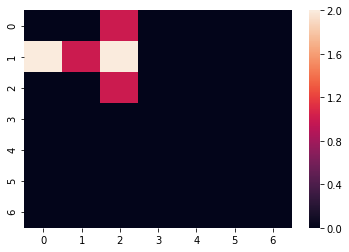

In [53]:
# The "confusion matrix" or matrix of coded agreements between coder0 and coder5
music_c = pyanno.measures.agreement.confusion_matrix(music_anno.annotations[:,0], music_anno.annotations[:,5],7)
print(music_c)
music_ac = seaborn.heatmap(music_c)
plt.show()

<span style="color:blue"> The confusion matrix shows the coded agreements between coder0 and coder5. It suggests these two coders are similar on the first 3 questions. But they have no code in common on other questions.

[[ 1.         -0.28       -0.11111111  0.1641791   0.11111111 -0.11111111
  -0.09375    -0.42372881 -0.09375    -0.58490566]
 [-0.28        1.          0.17714286 -0.28       -0.64571429 -0.40487805
   0.26153846  1.         -0.10769231 -0.30909091]
 [-0.11111111  0.17714286  1.          0.56923077  0.          0.53333333
   0.28813559 -0.30232558  0.52542373 -0.2       ]
 [ 0.1641791  -0.28        0.56923077  1.          0.35384615  0.55555556
   0.13846154 -0.47368421  0.35384615 -0.34615385]
 [ 0.11111111 -0.64571429  0.          0.35384615  1.          0.06666667
   0.28813559 -0.30232558  0.28813559 -0.2       ]
 [-0.11111111 -0.40487805  0.53333333  0.55555556  0.06666667  1.
  -0.18644068 -0.58490566  0.05084746 -0.42857143]
 [-0.09375     0.26153846  0.28813559  0.13846154  0.28813559 -0.18644068
   1.          0.14285714  0.53333333 -0.30232558]
 [-0.42372881  1.         -0.30232558 -0.47368421 -0.30232558 -0.58490566
   0.14285714  1.         -0.42857143 -0.07692308]
 [-0.093

/anaconda3/lib/python3.6/site-packages/pyanno/measures/helpers.py:166: RuntimeWarning: invalid value encountered in double_scalars
  return (observed_agreement - chance_agreement) / (1. - chance_agreement)


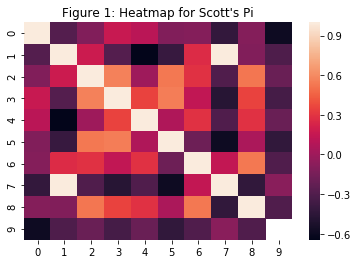

In [54]:
# Scott's pi
scotts_pi(music_anno.annotations[:,0], music_anno.annotations[:,1])
m_scotts_pi = pairwise_matrix(scotts_pi, music_anno.annotations)
print(m_scotts_pi)
ax = seaborn.heatmap(m_scotts_pi)
plt.title("Figure 1: Heatmap for Scott's Pi")
plt.show()

/anaconda3/lib/python3.6/site-packages/pyanno/measures/helpers.py:166: RuntimeWarning: invalid value encountered in double_scalars
  return (observed_agreement - chance_agreement) / (1. - chance_agreement)


[[ 1.          0.06666667  0.07894737  0.28205128  0.26315789  0.07894737
   0.07894737  0.          0.07894737  0.        ]
 [ 0.06666667  1.          0.17647059 -0.16666667 -0.64705882 -0.2173913
   0.3         1.         -0.05        0.        ]
 [ 0.07894737  0.17647059  1.          0.58823529  0.          0.5625
   0.3        -0.2173913   0.53333333  0.        ]
 [ 0.28205128 -0.16666667  0.58823529  1.          0.38235294  0.5625
   0.15151515 -0.23529412  0.36363636  0.        ]
 [ 0.26315789 -0.64705882  0.          0.38235294  1.          0.125
   0.3        -0.2173913   0.3         0.        ]
 [ 0.07894737 -0.2173913   0.5625      0.5625      0.125       1.
  -0.16666667 -0.27272727  0.06666667  0.        ]
 [ 0.07894737  0.3         0.3         0.15151515  0.3        -0.16666667
   1.          0.25        0.53333333  0.        ]
 [ 0.          1.         -0.2173913  -0.23529412 -0.2173913  -0.27272727
   0.25        1.         -0.25        0.        ]
 [ 0.07894737 -0.05   

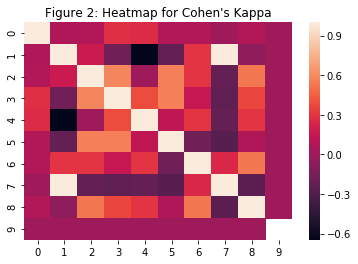

In [55]:
# Cohen's kappa
m_cohens_kappa = pairwise_matrix(cohens_kappa, music_anno.annotations)
print(m_cohens_kappa)
ax = seaborn.heatmap(m_cohens_kappa)
plt.title("Figure 2: Heatmap for Cohen's Kappa")
plt.show()

<span style="color:blue"> I use both Scott's Pi and Cohan's Kappa matrix to Figure 1 visualizes the Scott's Pi matrix, and Figure 2 visualizes the Cohen's Kappa matrix. In both of the matrices, 1 means the two coders are in complete agreement, while negative numbers mean the two coders have no aggreement. According to the results, coder2 stably agrees with coder3, coder5, and coder8. Coder6 is likely to agree with coder8. But coder5 doesn't have a high chance to agree with coder6. The other pairs are not likely to reach agreement. Comparing patterns in the two figures, we could see these 2 methods basically agree with each other, but Scott's Pi seems to be more sensitive to Cohan's Kappa.</span>

<span style="color:blue"> This casts doubts on reliability of humna coding in my case, since coders do not agree with each other in most of my cases. Or I need to expand my sample size to get a more general pattern of the agreement.</span>

# Models

However, what if some coders are better than others. The prior measures all rely on the assumption that all coders are equally good. What if some are worse than others? Now we use Rzhetsky et al (2009) and Dawid & Skene's models to make inference about true label classes by downweighting bad or deviant coders. Pyanno provides two relevant models: ModelB and ModelBt. Model B with $\theta$s models the relationship between each coder and code. Model B is a Bayesian generalization of the Dawid & Skene model from the reading. The following image schematically describes these models. <img src="../data/pyanno/Bmodel.png">

The models should provide very similar results. To estimate the parameters for any models, we first need to create a new model. 

In [5]:
# create a new instance of model B, with 4 label classes
model = ModelB.create_initial_state(4,8)
# other model parameters are initialized from the model prior
print(model.theta)
print(model.log_likelihood(anno.annotations))

[[[0.76513851 0.18545765 0.03613259 0.01327126]
  [0.18889947 0.55713082 0.17673479 0.07723492]
  [0.08924036 0.1047598  0.58295803 0.22304181]
  [0.03870936 0.07840576 0.13139744 0.75148743]]

 [[0.79962449 0.10605601 0.08763687 0.00668264]
  [0.14677479 0.64015339 0.14034133 0.07273049]
  [0.1042019  0.20630792 0.63358845 0.05590174]
  [0.12018565 0.08417664 0.15377318 0.64186453]]

 [[0.57218355 0.27787537 0.14480236 0.00513872]
  [0.1212557  0.5606062  0.10766321 0.21047489]
  [0.08760568 0.18216336 0.65458752 0.07564343]
  [0.00893256 0.09064417 0.22968922 0.67073405]]

 [[0.66906516 0.17768564 0.05258803 0.10066116]
  [0.16697322 0.62936408 0.20068297 0.00297973]
  [0.02176536 0.26846953 0.60614554 0.10361957]
  [0.07468807 0.07392333 0.37578372 0.47560488]]

 [[0.66385646 0.2083086  0.05794732 0.06988761]
  [0.30002536 0.52664986 0.13422061 0.03910416]
  [0.05231769 0.05911605 0.69797251 0.19059374]
  [0.02220375 0.04437609 0.30680717 0.62661299]]

 [[0.77603219 0.08517541 0.100

Now we train the model on our data. Pyanno allows one to use either MAP (maximum a posteriori estimation) or MLE (maximum likelihood estimation) to estimate model parameters. Note that the parameters here correspond to our estimation of the accuracy of each annotator-annotation pair. First we will train with MAP, and then you can optionally training with MLE.

In [6]:
samples = model.sample_posterior_over_accuracy(anno.annotations, 200, burn_in_samples=100, thin_samples=3)

In [7]:
model.map(anno.annotations)
print(model.theta)
print(model.log_likelihood(anno.annotations))

[[[7.73398728e-01 2.01020245e-01 2.55810269e-02 1.20101219e-26]
  [1.47832659e-01 7.11503767e-01 7.66499157e-02 6.40136580e-02]
  [1.97431020e-02 1.48708709e-01 6.96639326e-01 1.34908863e-01]
  [2.52463780e-18 2.13647377e-02 8.51550428e-02 8.93480220e-01]]

 [[7.19395465e-01 2.01828761e-01 7.87757734e-02 1.55486964e-13]
  [1.33941799e-01 7.07223261e-01 1.10418200e-01 4.84167403e-02]
  [2.72093282e-02 1.65178369e-01 6.71232700e-01 1.36379603e-01]
  [2.15358721e-30 5.38211823e-02 1.21871740e-01 8.24307077e-01]]

 [[8.50073137e-01 1.22955501e-01 2.69713621e-02 3.64395738e-42]
  [8.93514251e-02 7.89280333e-01 8.93429608e-02 3.20252811e-02]
  [6.11638366e-02 1.29121422e-01 7.03992731e-01 1.05722011e-01]
  [6.53666390e-03 5.12606512e-02 2.10869595e-01 7.31333090e-01]]

 [[6.99612801e-01 2.70976969e-01 2.94102301e-02 8.57899704e-52]
  [9.67171336e-02 7.62615701e-01 1.09523823e-01 3.11433425e-02]
  [1.81150586e-02 1.45472330e-01 6.85587954e-01 1.50824657e-01]
  [2.71897111e-47 2.98511124e-02 2

Uncomment the cell below if you would rather train by MLE.

In [ ]:
#model = ModelB.create_initial_state(4,8)
#model.mle(anno.annotations)
#print(model.theta)
#print(model.log_likelihood(anno.annotations))

Once we have model parameters estimated, we can now make inferences about the true label classes. We can calculate the posterior distribution over the true label classes.

In [8]:
posterior = model.infer_labels(anno.annotations)
print(posterior)

[[1.20741380e-42 1.00240780e-01 7.90821679e-01 1.08937540e-01]
 [9.92682453e-01 7.07056554e-03 2.46981317e-04 2.03944498e-49]
 [1.07420297e-03 5.51435353e-02 9.37476514e-01 6.30574822e-03]
 ...
 [8.15378491e-04 3.51193436e-02 9.59859130e-01 4.20614824e-03]
 [1.34481992e-44 2.14447325e-03 9.16166870e-01 8.16886569e-02]
 [2.14745550e-01 7.69057353e-01 1.61970966e-02 2.01807019e-26]]


Let's turn the posterior of the first 100 samples into a heatmap and compare with the raw vote tallies.

In [9]:
def makeQuestionComparison(model, anno_target, num_questions = 20):
    votes = []
    for r in anno_target.annotations:
        v = [0] * len(anno_target.labels)
        votes.append(v)
        for a in r:
            if a > -1:
                v[a] += 1
    votes_array = np.array(votes)
    posterior = model.infer_labels(anno_target.annotations)
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize = (15, 10), sharey=True)

    seaborn.heatmap(votes_array[:num_questions], annot = True, ax=ax2)
    seaborn.heatmap(np.nan_to_num(posterior,0)[:num_questions], annot=True, ax =ax1)
    ax1.set_title("Model")
    ax2.set_title("Votes")
    return fig, (ax1, ax2)

(<matplotlib.figure.Figure at 0x116372470>,
 (<matplotlib.axes._subplots.AxesSubplot at 0x119cb0898>,
  <matplotlib.axes._subplots.AxesSubplot at 0x11a1c68d0>))

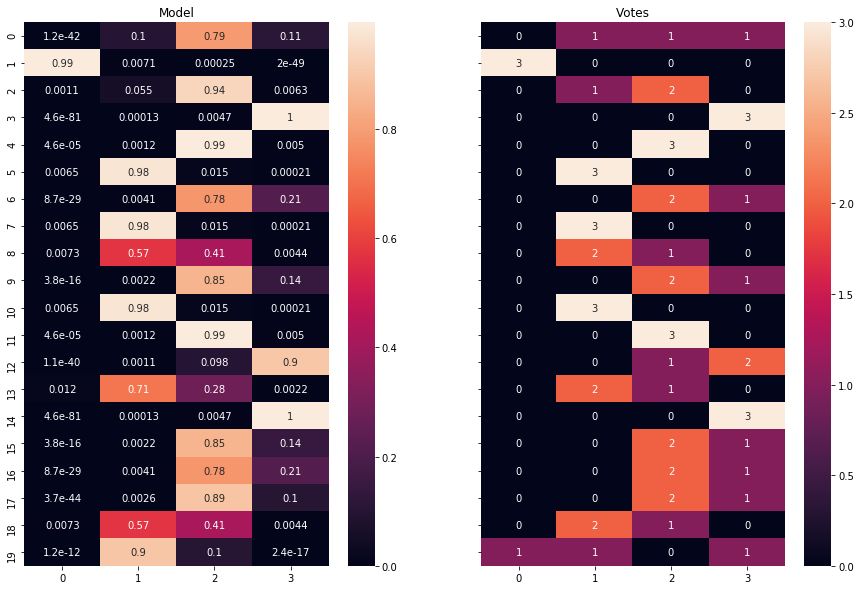

In [10]:
makeQuestionComparison(model, anno)

This differs markedly from taking annotator scores at face value. As you can see (the model-based probabilities are on left; the raw votes on right), the models helps us break ties between coders and in some cases dramatically downgrades the estimates from particularly bad coders.

Let's try everything again with ModelBt, which constrains ModelB so that each coder has a single estimate over the accuracy of all of their codes.

In [11]:
# create a new instance of model B, with 4 label classes and 8 annotators.
model = ModelBt.create_initial_state(4, 8)
print(model.theta)
print(model.log_likelihood(anno.annotations))

[0.72482894 0.90326757 0.62687962 0.89494766 0.80611172 0.64958288
 0.70349672 0.65258743]
-3031.226076712136


In [12]:
model.map(anno.annotations)
print(model.theta)
print(model.log_likelihood(anno.annotations))

[0.79145202 0.74074114 0.76229097 0.72511116 0.71656715 0.71857358
 0.77311358 0.71681384]
-2811.946626920941


In [13]:
model.sample_posterior_over_accuracy(anno.annotations, 200, burn_in_samples=100, thin_samples=3)

array([[0.83150371, 0.77672925, 0.72502734, ..., 0.70507919, 0.74532995,
        0.71057028],
       [0.83150371, 0.77672925, 0.72502734, ..., 0.70507919, 0.74532995,
        0.71057028],
       [0.83150371, 0.77672925, 0.72502734, ..., 0.70507919, 0.74532995,
        0.71057028],
       ...,
       [0.80199998, 0.73908683, 0.79593613, ..., 0.77431856, 0.72157263,
        0.6847573 ],
       [0.80199998, 0.73908683, 0.79593613, ..., 0.77431856, 0.72157263,
        0.6847573 ],
       [0.80199998, 0.73908683, 0.79593613, ..., 0.77431856, 0.72157263,
        0.6847573 ]])

In [15]:
posterior = model.infer_labels(anno.annotations)
print(posterior)

[[0.01109925 0.28949235 0.36481155 0.33459685]
 [0.9902341  0.0024163  0.00404453 0.00330506]
 [0.00249761 0.0550459  0.93463018 0.00782631]
 ...
 [0.00252691 0.04395922 0.94559574 0.00791813]
 [0.00249193 0.00570873 0.93250364 0.0592957 ]
 [0.03188989 0.93884749 0.01610343 0.0131592 ]]


Let's visualize the posterior of the first 10 samples according to ModelBt.

(<matplotlib.figure.Figure at 0x119bffa90>,
 (<matplotlib.axes._subplots.AxesSubplot at 0x11a7ad208>,
  <matplotlib.axes._subplots.AxesSubplot at 0x11a81aba8>))

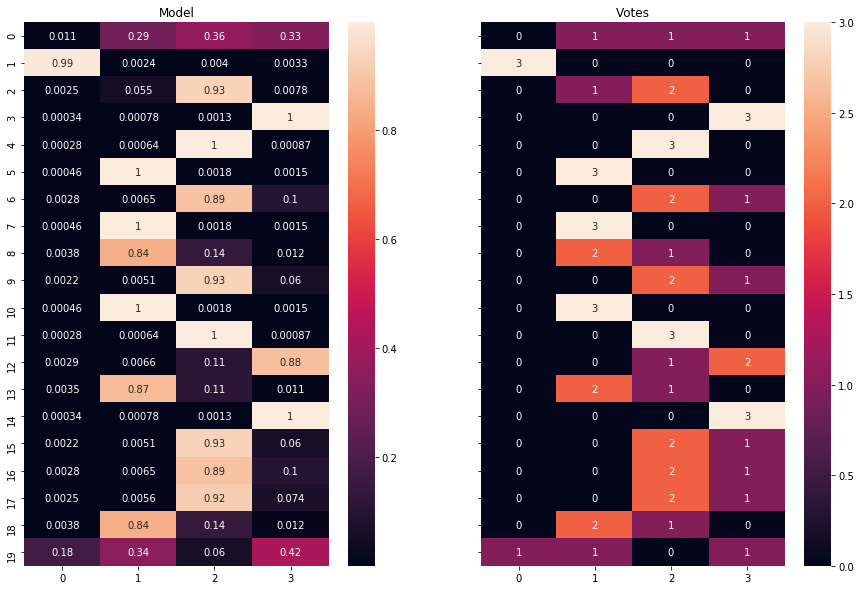

In [16]:
makeQuestionComparison(model, anno)

The property of these scores is that they enable us to identify the most likely code assuming coders of unequal quality, which also allows us to break ties when we know coder identity. We may also use the posterior themselves rather than the most probably code outcome.

## Visualizing coder accuracy

Let's make a plot of the accuracy for each annotator inferred from ModelBt. This might be helpful if you wanted to ban a "troll" from your crowdsourcing enterprise. The coder a very low accuracy likelihood is an outlier and should be "dropped from the team."

In [17]:
model = ModelBt.create_initial_state(4,8)
model.mle(anno.annotations)
samples = model.sample_posterior_over_accuracy(anno.annotations, 200, burn_in_samples=100, thin_samples=3)
y =  samples.mean(axis=0)
y_ci = samples.std(axis=0)

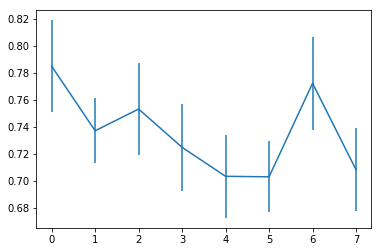

In [18]:
plt.figure()
plt.errorbar(range(8),y, yerr = y_ci)
plt.show()

# Hotel Reviews

If we want to do a simpler analysis we can look at a different data set, here are some hotel reviews from [expedia](https://www.kaggle.com/c/expedia-hotel-recommendations)

In [ ]:
df_hotels = pandas.read_csv('../data/hot_Reviews.csv', index_col=0)
df_hotels[:5]

Here a rank of 0 is a missing value and to simplify things more we will convert from a 1-10 scale to a 1-5 scale, with 0 as missing

In [ ]:
df_hotels = df_hotels.apply(lambda x: x // 2) #integer divide by 2 rounds all values

And we can visualize all the reviews as a heatmap with the missing values greyed out

In [ ]:
fig, ax = plt.subplots(figsize = (20,20))
seaborn.heatmap(df_hotels, cmap='rainbow', ax = ax)
plt.show()

To give the dataframe to pyanno we need to convert to np array and change the nans to intergers, lets use -1

In [ ]:
hot_mat = np.array(df_hotels.fillna(-1).as_matrix())
anno_hot = AnnotationsContainer.from_array(hot_mat, missing_values=[-1])

In [ ]:
anno_hot.annotations

In [ ]:
anno_hot.labels

In [ ]:
anno_hot.missing_values

Look at coder agreement

In [ ]:
pyanno.measures.agreement.labels_frequency(anno_hot.annotations, 6)#6 possible catagories

In [ ]:
c = pyanno.measures.agreement.confusion_matrix(anno_hot.annotations[:,0], anno_hot.annotations[:,1], 6) #6 possible catagories
print(c)
ac = seaborn.heatmap(c)
plt.show()

Most agreement is on 2 i.e. an average hotel and there's little agreement as rating go higher, likely due to scarcity in the sample

In [ ]:
scotts_pi(anno_hot.annotations[:,0], anno_hot.annotations[:,1])

In [ ]:
krippendorffs_alpha(anno_hot.annotations[::])

In [ ]:
cohens_kappa(anno_hot.annotations[:,0], anno_hot.annotations[:,1])

In [ ]:
m = pairwise_matrix(cohens_kappa, anno_hot.annotations)
fig, ax = plt.subplots(figsize = (15, 15))
seaborn.heatmap(m, ax =ax)

And to look at what model Bt thinkgs the correct reviews are:

In [ ]:
model_hot = ModelBt.create_initial_state(6, 49)
model_hot.mle(anno_hot.annotations)
#print(model.theta)
print(model_hot.log_likelihood(anno_hot.annotations))

In [ ]:
makeQuestionComparison(model_hot, anno_hot)

## <span style="color:red">*Exercise 3*</span>

<span style="color:red">In the cells immediately following, use the results of your content annotation survey to predict high and low-quality analysts, then predict MLE or MAP estimates for your codes in question. What do these estimates suggest about the distribution of skill among your coders? How different are these estimates from a majority vote?

<span style="color:blue"> Here I predict MLE estimates for my codes.</span>

In [42]:
## Train model by MLE
# Create a new instance of model B, with 4 label classes
music_model = ModelB.create_initial_state(4,10)
# Other model parameters are initialized from the model prior
print(music_model.theta)
print(music_model.log_likelihood(music_anno.annotations))

[[[0.53123931 0.27256958 0.14311926 0.05307186]
  [0.15543972 0.57922391 0.10922796 0.15610841]
  [0.03114765 0.19356962 0.51977657 0.25550616]
  [0.03228449 0.11788518 0.31204818 0.53778214]]

 [[0.49505626 0.27399462 0.19817714 0.03277199]
  [0.09806608 0.70292135 0.12916457 0.069848  ]
  [0.09341644 0.17546856 0.57387941 0.15723559]
  [0.02769359 0.03207661 0.20336135 0.73686846]]

 [[0.73859474 0.23401117 0.02255543 0.00483866]
  [0.05141666 0.78598058 0.0170291  0.14557366]
  [0.13564858 0.09883835 0.67706809 0.08844498]
  [0.02630143 0.04604637 0.26600047 0.66165173]]

 [[0.85304708 0.08371644 0.0441545  0.01908199]
  [0.13812135 0.64249174 0.17356714 0.04581977]
  [0.0689724  0.07868856 0.79050569 0.06183335]
  [0.00640341 0.145549   0.14852488 0.69952271]]

 [[0.74061159 0.18792055 0.05526473 0.01620313]
  [0.19643936 0.63008201 0.15742249 0.01605614]
  [0.08200562 0.2461362  0.61093879 0.06091939]
  [0.12475708 0.11572353 0.18116762 0.57835176]]

 [[0.89304607 0.02817953 0.067

In [43]:
music_model.sample_posterior_over_accuracy(music_anno.annotations, 200, burn_in_samples=100, thin_samples=3)

(array([[[[4.84921537e-01, 3.49962924e-01, 1.59128550e-01,
           5.98698870e-03],
          [1.15160172e-01, 7.24156614e-01, 1.06152152e-01,
           5.45310612e-02],
          [7.24559554e-02, 1.13114446e-01, 6.76596510e-01,
           1.37833089e-01],
          [1.17971963e-02, 2.48158220e-02, 2.26142563e-01,
           7.37244419e-01]],
 
         [[7.68823919e-01, 1.00954298e-01, 5.85418759e-02,
           7.16799066e-02],
          [1.64959167e-01, 5.65591915e-01, 1.47646348e-01,
           1.21802571e-01],
          [4.51352689e-02, 2.08573619e-01, 5.23008433e-01,
           2.23282679e-01],
          [2.50098013e-02, 8.47888348e-02, 6.68417081e-02,
           8.23359656e-01]],
 
         [[6.22230055e-01, 1.99624895e-01, 1.11277489e-01,
           6.68675607e-02],
          [1.74985448e-01, 6.15008507e-01, 1.21250267e-01,
           8.87557781e-02],
          [6.97887998e-02, 1.96742984e-01, 5.35009892e-01,
           1.98458325e-01],
          [1.89300532e-02, 1.11508433

In [44]:
music_posterior = music_model.infer_labels(music_anno.annotations)
print(music_posterior)

[[9.96156267e-01 3.84125255e-03 2.47762760e-06 2.36514621e-09]
 [9.85795517e-01 1.59865958e-04 1.40441722e-02 4.45254867e-07]
 [9.99999751e-01 2.38462269e-07 1.04040245e-08 1.44363714e-12]
 [9.99976081e-01 1.12683145e-05 1.26507356e-05 8.11977596e-11]
 [1.06964318e-03 4.12894065e-05 9.98880914e-01 8.15370965e-06]
 [9.65477023e-02 3.47025134e-04 9.03067454e-01 3.78181611e-05]
 [9.00065842e-01 9.98651917e-02 6.88637184e-05 1.02300118e-07]]


(<matplotlib.figure.Figure at 0x11b915e48>,
 (<matplotlib.axes._subplots.AxesSubplot at 0x11b9de5f8>,
  <matplotlib.axes._subplots.AxesSubplot at 0x11bab8128>))

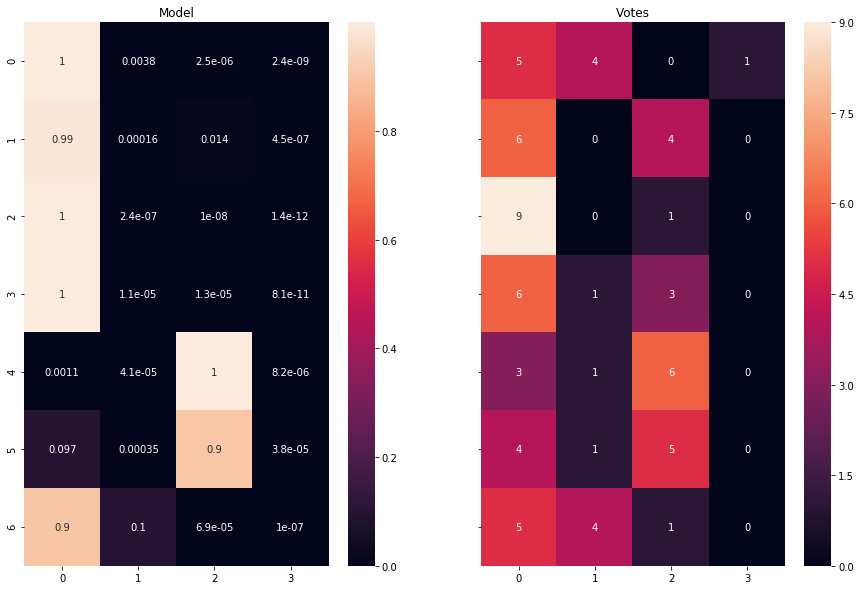

In [45]:
# Visualize
makeQuestionComparison(music_model, music_anno)

In [47]:
## Visuzlize accuracy

# Calculate accuracy
music_model = ModelBt.create_initial_state(4,10)
music_model.mle(music_anno.annotations)
music_samples = music_model.sample_posterior_over_accuracy(music_anno.annotations, 200, burn_in_samples=100, thin_samples=3)
music_y =  music_samples.mean(axis=0)
music_y_ci = music_samples.std(axis=0)

(<matplotlib.figure.Figure at 0x11b9def98>,
 (<matplotlib.axes._subplots.AxesSubplot at 0x11bb591d0>,
  <matplotlib.axes._subplots.AxesSubplot at 0x11b8839b0>))

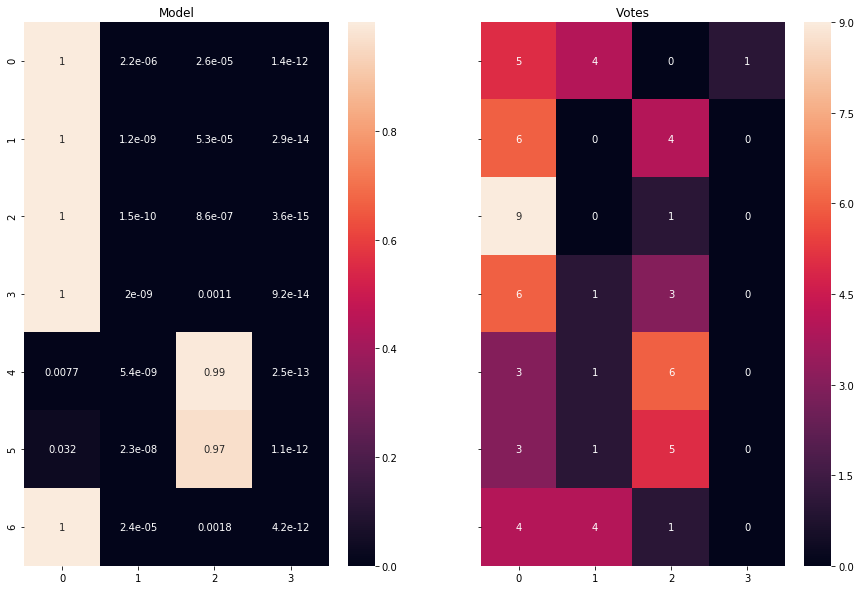

In [58]:
# Visualize
makeQuestionComparison(music_model, music_anno)

<span style="color:blue"> Both of the 2 sets of heatmaps show similar patterns. The first class agrees on most most of the questions. The second class slightly agrees on the first question and the last question. The third class basically agrees on question4 and question5. And the fourth class basically agrees on nothing.</span>

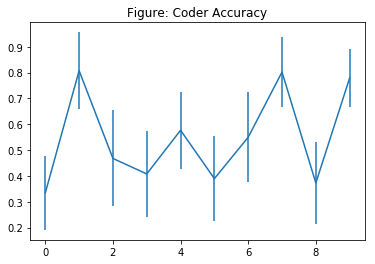

In [48]:
# Visualize
plt.figure()
plt.errorbar(range(10),music_y, yerr = music_y_ci)
plt.title('Figure: Coder Accuracy')
plt.show()

<span style="color:blue"> The plot above shows that the skills of coders are not very stable. While coder2, coder7 and coder9 have high accuracy of coding, the others have relatively lower accuracy. The majority have vote accuracy around 0.5.